E: Package 'python-software-properties' has no installation candidate
··········


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
from keras import layers
from keras.optimizers import Adam
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from google.colab import files

In [0]:
keras.backend.clear_session()

In [5]:

base_model=MobileNet(input_shape = (224,224,3),weights='imagenet',include_top=False)

#x=base_model.output
#x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dense(1024,activation='relu')(x) #dense layer 2
#x=Dense(512,,activation='softmax')(x) #final layer with softmax activation
for layer in base_model.layers[:-4]:
  layer.trainable = False
model = keras.models.Sequential()
model.add(base_model)
#base_model.summary()
model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dropout(0.05))
#model.add(layers.Dense(2, activation='sigmoid'))

#model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 3,492,035
Trainable params: 1,313,795
Non-trainable params: 2,178,240
_________________________________________________________________


In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                validation_split=0.1, rotation_range= 30, horizontal_flip=True)
                                 #rotation_range=45, 
                                 #horizontal_flip=True) #included in our dependencies
#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/pokemon-small',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')
test_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/pokemon-small',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 class_mode='categorical',
                                                 subset='validation')
label_map = (train_generator.class_indices)
label_map

Found 380 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


{'Jigglypuff': 0, 'Pikachu': 1, 'Slowpoke': 2}

In [7]:
from keras.optimizers import SGD
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate/ epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(
                    generator=train_generator,
                    steps_per_epoch=train_generator.samples,
                    epochs=epochs, 
                    validation_data = test_generator, 
                    validation_steps = test_generator.samples)



Instructions for updating:
Use tf.cast instead.
Epoch 1/5
  8/380 [..............................] - ETA: 21:36 - loss: 1.4121 - acc: 0.7539

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


380/380 [==============================] - 481s 1s/step - loss: 0.0418 - acc: 0.9916 - val_loss: 0.4430 - val_acc: 0.9155
Epoch 2/5
380/380 [==============================] - 445s 1s/step - loss: 8.9983e-04 - acc: 0.9999 - val_loss: 0.4717 - val_acc: 0.9071
Epoch 3/5
380/380 [==============================] - 442s 1s/step - loss: 7.0858e-04 - acc: 0.9999 - val_loss: 0.4093 - val_acc: 0.9061
Epoch 4/5
380/380 [==============================] - 439s 1s/step - loss: 7.8643e-04 - acc: 0.9999 - val_loss: 0.4140 - val_acc: 0.9156
Epoch 5/5
380/380 [==============================] - 440s 1s/step - loss: 3.5698e-04 - acc: 1.0000 - val_loss: 0.4340 - val_acc: 0.9085


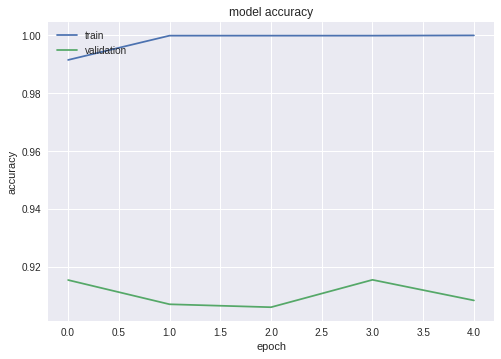

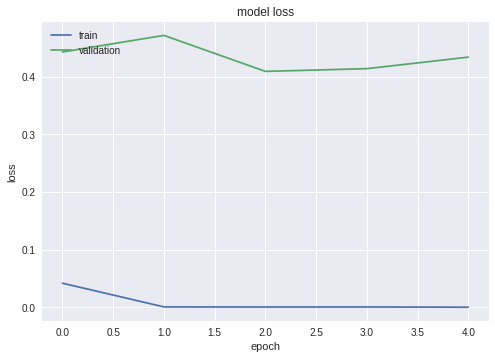

In [8]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:

keras_file = "keras_model.h5"
model.save(keras_file)

# Convert to TensorFlow Lite model.
#onverter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
#lite_model = converter.convert()
#pen("converted_model.tflite", "wb").write(tflite_model)

In [0]:
from google.colab import files

In [0]:
files.download(keras_file)

In [12]:
# Convert to TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
lite_model = converter.convert()
open("pokemon.tflite", "wb").write(lite_model)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 139 variables.
INFO:tensorflow:Converted 139 variables to const ops.


13849976

In [0]:
files.download("pokemon.tflite")


In [0]:
import numpy as np
from keras.preprocessing import image

In [14]:
label_map = (train_generator.class_indices)
label_map


model._make_predict_function()
graph = tf.get_default_graph()
#graph.summary()
with graph.as_default():
  test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/025.png', target_size=(224, 224, 3))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  pImg = preprocess_input(test_image)
  result = model.predict(pImg)
  print(result)

ValueError: ignored

{'Cotton Leaf Curl Virus (CLCuD) _ Yahoo India Image Search results': 0,
 'bacterial blight disease in cotton _ Yahoo India Image Search results': 1,
 'cotton plant': 2,
 'grey mildew of cotton _ Google Search': 3,
 'root rot cotton _ Yahoo India Image Search results': 4}

Epoch 1/5
275/275 [==============================] - 159s 579ms/step - loss: 0.0232 - acc: 0.9935 - val_loss: 0.3918 - val_acc: 0.9096
Epoch 2/5
275/275 [==============================] - 153s 558ms/step - loss: 0.0044 - acc: 0.9984 - val_loss: 0.6031 - val_acc: 0.8680
Epoch 3/5
275/275 [==============================] - 153s 556ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.5599 - val_acc: 0.8716
Epoch 4/5
275/275 [==============================] - 153s 556ms/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.5659 - val_acc: 0.8728
Epoch 5/5
275/275 [==============================] - 153s 558ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.6100 - val_acc: 0.8692
